# Problem Statement

## Airline Passenger Satisfaction

This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

In [ ]:
#importing required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the train and test datasets 
train_data=pd.read_csv('/content/train.csv',nrows=2000)
test_data=pd.read_csv('/content/test.csv',nrows=2000)

In [ ]:
# To check the train_data 
train_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
#To check the test_data
test_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,3,5,5,5,5,2,5,5,50,44.0
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,5,4,4,4,4,3,4,5,0,0.0
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,2,4,1,3,2,2,2,0,0.0
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,4,1,1,1,1,3,1,4,0,6.0
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,2,4,2,4,0,20.0


In [ ]:
# to check train_data shape
# It shows the no of records & features present in the train_data
train_data.shape

(2000, 25)

In [ ]:
# to check test_data shape
# It shows the no of records & features present in the test_data
test_data.shape

(2000, 24)

In [ ]:
# Describing the data i.e.,Total count,Range,percentiles,standard deviation of each feature 
train_data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1997.000000
mean,999.500000,65864.930500,39.41250,1210.085000,2.724500,3.063000,2.765500,2.968000,3.217500,3.231500,3.428500,3.315500,3.375500,3.293500,3.586500,3.319000,3.615500,3.273000,15.068000,15.609915
std,577.494589,37402.978094,15.22433,1015.526506,1.316232,1.526498,1.401603,1.264427,1.342794,1.341569,1.330328,1.341588,1.264238,1.310808,1.164558,1.261362,1.198907,1.316943,35.951073,36.341422
min,0.000000,54.000000,7.00000,67.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,499.750000,33689.750000,27.00000,405.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,999.500000,65635.000000,40.00000,861.500000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,1499.250000,98656.500000,51.00000,1749.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,13.000000,14.000000
max,1999.000000,129860.000000,80.00000,4243.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,412.000000,459.000000


In [ ]:
# Describing the data i.e.,Total count,Range,percentiles,standard deviation of each feature 
test_data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,1993.000000
mean,999.500000,64888.592500,40.008000,1226.19600,2.72850,3.034000,2.731000,2.960500,3.238000,3.240500,3.464000,3.399500,3.372000,3.389000,3.618500,3.284500,3.67850,3.312000,15.919000,16.083793
std,577.494589,37802.046665,15.290776,1002.06434,1.33779,1.515253,1.397718,1.291036,1.340244,1.368794,1.340747,1.320898,1.288195,1.297891,1.147003,1.288561,1.13304,1.342593,43.404198,42.744366
min,0.000000,79.000000,7.000000,73.00000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000
25%,499.750000,31757.500000,27.000000,420.00000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.00000,2.000000,0.000000,0.000000
50%,999.500000,64806.500000,41.000000,897.00000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000,0.000000,0.000000
75%,1499.250000,97450.500000,51.250000,1835.00000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.00000,4.000000,14.000000,14.000000
max,1999.000000,129771.000000,80.000000,4817.00000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,951.000000,940.000000


In [ ]:
#no of unique values in each feature 
train_data.nunique()

Unnamed: 0                           2000
id                                   2000
Gender                                  2
Customer Type                           2
Age                                    67
Type of Travel                          2
Class                                   3
Flight Distance                      1058
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           5
Food and drink                          6
Online boarding                         6
Seat comfort                            5
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         5
Inflight service                        6
Cleanliness                             5
Departure Delay in Minutes            149
Arrival Delay in Minutes          

In [ ]:
#no of unique values in each feature 
test_data.nunique()

Unnamed: 0                           2000
id                                   2000
Gender                                  2
Customer Type                           2
Age                                    72
Type of Travel                          2
Class                                   3
Flight Distance                      1086
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           5
Food and drink                          6
Online boarding                         6
Seat comfort                            5
Inflight entertainment                  5
On-board service                        5
Leg room service                        6
Baggage handling                        5
Checkin service                         5
Inflight service                        5
Cleanliness                             5
Departure Delay in Minutes            153
Arrival Delay in Minutes          

In [ ]:
#info regarding class , index , non null values count , Data Types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         2000 non-null   int64  
 1   id                                 2000 non-null   int64  
 2   Gender                             2000 non-null   object 
 3   Customer Type                      2000 non-null   object 
 4   Age                                2000 non-null   int64  
 5   Type of Travel                     2000 non-null   object 
 6   Class                              2000 non-null   object 
 7   Flight Distance                    2000 non-null   int64  
 8   Inflight wifi service              2000 non-null   int64  
 9   Departure/Arrival time convenient  2000 non-null   int64  
 10  Ease of Online booking             2000 non-null   int64  
 11  Gate location                      2000 non-null   int64

In [ ]:
#info regarding class , index , non null values count , Data Types
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         2000 non-null   int64  
 1   id                                 2000 non-null   int64  
 2   Gender                             2000 non-null   object 
 3   Customer Type                      2000 non-null   object 
 4   Age                                2000 non-null   int64  
 5   Type of Travel                     2000 non-null   object 
 6   Class                              2000 non-null   object 
 7   Flight Distance                    2000 non-null   int64  
 8   Inflight wifi service              2000 non-null   int64  
 9   Departure/Arrival time convenient  2000 non-null   int64  
 10  Ease of Online booking             2000 non-null   int64  
 11  Gate location                      2000 non-null   int64

In [ ]:
#Total null values count in data 
train_data.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             3
satisfaction                         0
dtype: int64

In [ ]:
#Total null values count in data 
test_data.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             7
dtype: int64

In [ ]:
#filling null values in train_data using median 
train_data['Arrival Delay in Minutes'].fillna(train_data['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

In [ ]:
#filling null values in test_data using median
test_data['Arrival Delay in Minutes'].fillna(test_data['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

In [ ]:
#Checking the null values are filled or not
train_data.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
#Checking the null values are filled or not
test_data.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [ ]:
#correlation between features 
train_data.corr()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Unnamed: 0,1.000000,0.017380,0.048814,-0.016179,-0.014532,-0.000608,0.004216,0.027209,-0.013316,-0.015136,-0.009533,-0.046018,-0.041552,-0.009716,-0.026561,-0.010060,-0.027258,-0.019146,-0.015248,-0.002261
id,0.017380,1.000000,-0.006812,0.093438,-0.046370,-0.027875,-0.023055,-0.020891,0.048019,0.018493,0.048590,-0.001747,0.025314,0.035754,0.059578,0.034240,0.069160,0.035513,0.006383,-0.017270
Age,0.048814,-0.006812,1.000000,0.084608,0.003003,0.056225,0.019281,0.000556,0.040096,0.191239,0.192916,0.056864,0.009830,0.031030,-0.091499,0.050298,-0.092082,0.070854,-0.046082,-0.041746
Flight Distance,-0.016179,0.093438,0.084608,1.000000,0.025885,-0.016738,0.041698,0.008014,0.058747,0.230008,0.152674,0.136771,0.110212,0.134281,0.061172,0.037435,0.054221,0.094056,-0.028693,-0.042044
Inflight wifi service,-0.014532,-0.046370,0.003003,0.025885,1.000000,0.314137,0.706864,0.331952,0.121662,0.434168,0.090879,0.203359,0.143068,0.210129,0.138102,-0.003987,0.118922,0.112385,0.038412,0.029564
Departure/Arrival time convenient,-0.000608,-0.027875,0.056225,-0.016738,0.314137,1.000000,0.448111,0.480264,0.010883,0.048814,0.026607,0.009587,0.059798,0.031256,0.041958,0.091662,0.061077,0.029513,0.005728,0.003691
Ease of Online booking,0.004216,-0.023055,0.019281,0.041698,0.706864,0.448111,1.000000,0.503007,0.025519,0.366491,0.013405,0.048943,0.030521,0.149934,0.043235,-0.028972,0.040686,-0.000532,0.027062,0.018603
Gate location,0.027209,-0.020891,0.000556,0.008014,0.331952,0.480264,0.503007,1.000000,-0.024478,-0.005363,-0.035561,0.002416,-0.013447,0.013215,0.042648,-0.056014,-0.012410,-0.005566,-0.004508,-0.005931
Food and drink,-0.013316,0.048019,0.040096,0.058747,0.121662,0.010883,0.025519,-0.024478,1.000000,0.240565,0.575090,0.612237,0.094786,0.031072,0.017874,0.056481,0.045758,0.633733,0.001124,-0.006464
Online boarding,-0.015136,0.018493,0.191239,0.230008,0.434168,0.048814,0.366491,-0.005363,0.240565,1.000000,0.423695,0.277365,0.152235,0.134870,0.073148,0.179827,0.084916,0.324936,-0.035301,-0.047449


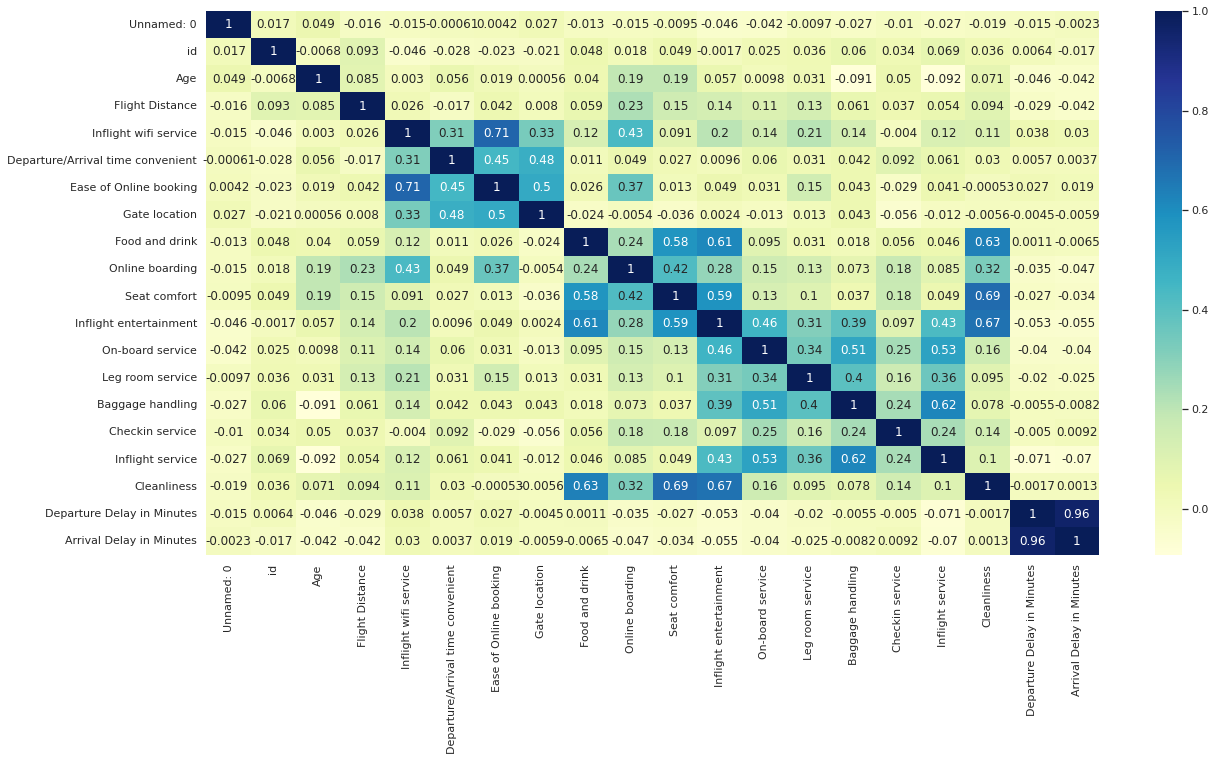

In [ ]:
# features correlation with  visualization using seaborn
sns.set(rc={'figure.figsize': (20, 10)})
sns .heatmap(train_data.corr(),annot=True,annot_kws={'size':12},cmap="YlGnBu")
plt.show()

In [ ]:
#correlation between features
test_data.corr()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Unnamed: 0,1.000000,-0.010256,-0.011916,0.000510,-0.019090,0.003213,0.019346,0.021278,-0.007611,0.001282,-0.009629,0.000139,-0.007144,0.002969,-0.026589,-0.030500,-0.012580,0.003774,0.032399,0.024035
id,-0.010256,1.000000,0.037881,0.103843,-0.051294,-0.019115,0.017067,0.026344,-0.006961,0.046622,0.062375,-0.017399,0.062722,0.027769,0.040687,0.096398,0.076433,0.022242,-0.014562,-0.036067
Age,-0.011916,0.037881,1.000000,0.125795,0.028327,0.023911,-0.000882,-0.033484,0.053927,0.192384,0.166040,0.120684,0.066871,0.007884,-0.005816,0.056300,-0.023557,0.091306,0.012417,-0.001571
Flight Distance,0.000510,0.103843,0.125795,1.000000,0.019595,-0.014065,0.059504,0.016426,0.042199,0.248705,0.176888,0.152875,0.152413,0.150278,0.098352,0.064339,0.077166,0.115512,0.014356,0.011859
Inflight wifi service,-0.019090,-0.051294,0.028327,0.019595,1.000000,0.350051,0.686743,0.337013,0.130083,0.490534,0.148363,0.218528,0.143107,0.161408,0.143721,0.038446,0.133803,0.125449,-0.032109,-0.034941
Departure/Arrival time convenient,0.003213,-0.019115,0.023911,-0.014065,0.350051,1.000000,0.454757,0.474535,0.005374,0.109175,0.057484,0.033700,0.079116,-0.013342,0.067624,0.111107,0.099028,0.068553,-0.000247,-0.004346
Ease of Online booking,0.019346,0.017067,-0.000882,0.059504,0.686743,0.454757,1.000000,0.455131,0.022443,0.415062,0.049286,0.055527,0.059772,0.092733,0.054217,-0.000539,0.055289,0.041548,0.026704,0.021768
Gate location,0.021278,0.026344,-0.033484,0.016426,0.337013,0.474535,0.455131,1.000000,-0.035907,0.016702,0.006548,-0.010103,-0.034474,-0.006350,-0.022343,-0.045865,-0.027495,0.003939,0.012191,0.009934
Food and drink,-0.007611,-0.006961,0.053927,0.042199,0.130083,0.005374,0.022443,-0.035907,1.000000,0.230563,0.581042,0.636879,0.060537,0.029574,0.037291,0.062446,0.026695,0.648453,-0.009609,-0.019599
Online boarding,0.001282,0.046622,0.192384,0.248705,0.490534,0.109175,0.415062,0.016702,0.230563,1.000000,0.418913,0.309009,0.185279,0.106409,0.121239,0.201985,0.089232,0.327994,-0.018811,-0.029861


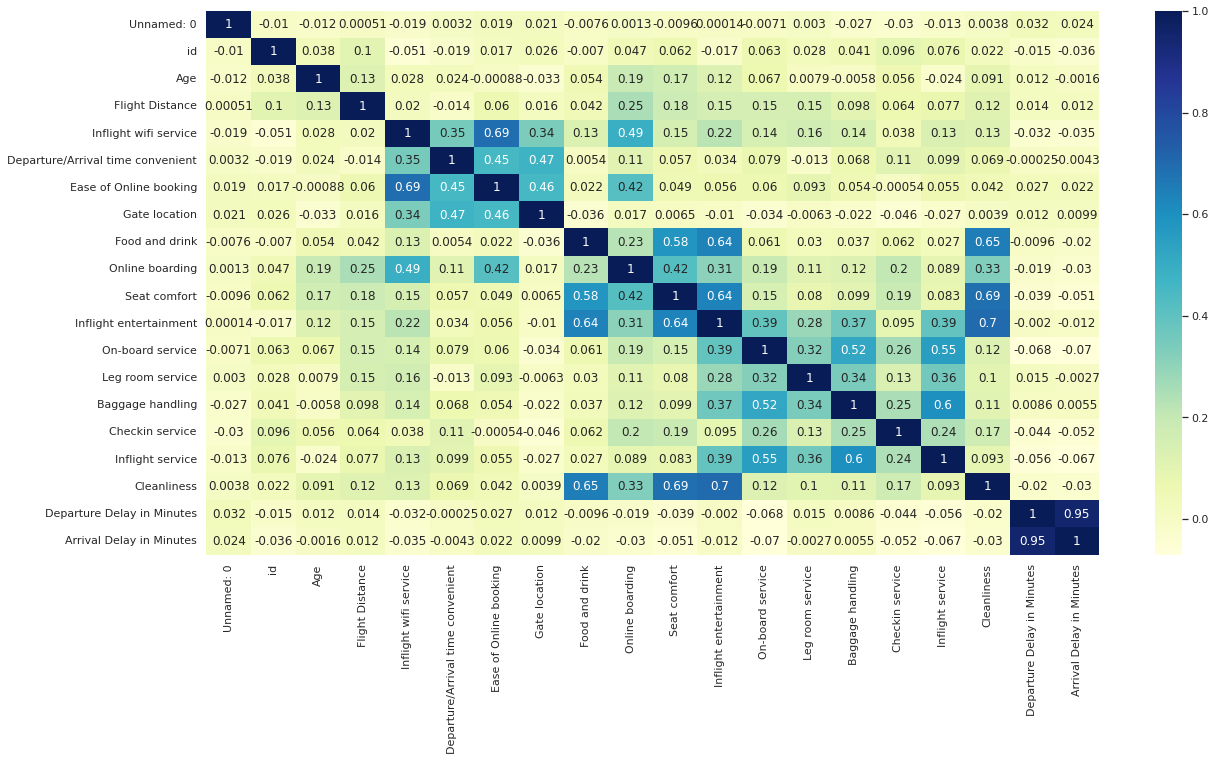

In [ ]:
# features correlation with  visualization using seaborn
sns.set(rc={'figure.figsize': (20, 10)})
sns .heatmap(test_data.corr(),annot=True,annot_kws={'size':12},cmap="YlGnBu")
plt.show()

In [ ]:
#droping unwanted columns from the data
train_data=train_data.drop(train_data.columns[[0,1]],axis=1)
test_data=test_data.drop(test_data.columns[[0,1]],axis=1)

In [ ]:
#Split the dataset into features and target variable.
xtr=train_data.drop(['Seat comfort','Inflight entertainment','Ease of Online booking','Departure Delay in Minutes','satisfaction'],axis=1)
xte=test_data.drop(['Seat comfort','Inflight entertainment','Ease of Online booking','Departure Delay in Minutes'],axis=1)
ytr=train_data[['satisfaction']]

In [ ]:
xtr

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Gate location,Food and drink,Online boarding,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,1,5,3,4,3,4,4,5,5,18.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,1,3,1,5,3,1,4,1,6.0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,5,5,4,3,4,4,4,5,0.0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,2,2,2,5,3,1,4,2,9.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,4,5,3,4,4,3,3,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Male,Loyal Customer,46,Business travel,Business,3533,4,4,4,3,1,3,3,3,1,3,2,0.0
1996,Female,disloyal Customer,27,Business travel,Eco,356,2,0,1,2,2,2,4,2,4,2,2,0.0
1997,Male,Loyal Customer,49,Personal Travel,Eco,1390,4,4,4,5,4,5,3,5,4,4,5,0.0
1998,Female,Loyal Customer,28,Business travel,Business,1626,1,4,1,4,4,2,4,1,4,1,4,0.0


In [ ]:
xte

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Gate location,Food and drink,Online boarding,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,4,3,4,5,5,5,2,5,5,44.0
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,1,5,4,4,4,4,3,4,5,0.0
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,4,2,2,4,1,3,2,2,2,0.0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,2,3,4,1,1,1,3,1,4,6.0
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,3,4,1,2,2,2,4,2,4,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Male,Loyal Customer,25,Personal Travel,Eco,1721,1,5,2,5,1,5,3,3,4,4,5,4.0
1996,Female,Loyal Customer,41,Business travel,Business,2026,3,3,3,5,4,3,3,3,3,3,3,0.0
1997,Male,Loyal Customer,46,Personal Travel,Eco Plus,1488,3,4,3,1,3,3,3,5,4,5,1,0.0
1998,Male,Loyal Customer,39,Personal Travel,Eco,1797,4,2,4,2,4,3,2,2,1,3,2,12.0


In [ ]:
#Seperating the Numerical & Categorical columns of xtr.
num_cols=list(xtr.select_dtypes(exclude='object').columns)
cat_cols=list(xtr.select_dtypes(include='object').columns)

In [ ]:
cat_cols

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [ ]:
num_cols

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Arrival Delay in Minutes']

In [ ]:
#Converting the Numerical & Categorical columns into Data Frames
xtr_num=xtr[num_cols]
xtr_cat=xtr[cat_cols]
xtr[cat_cols]=xtr[cat_cols].astype("category")
xtr_cat

,Gender,Customer Type,Type of Travel,Class
0,Male,Loyal Customer,Personal Travel,Eco Plus
1,Male,disloyal Customer,Business travel,Business
2,Female,Loyal Customer,Business travel,Business
3,Female,Loyal Customer,Business travel,Business
4,Male,Loyal Customer,Business travel,Business
...,...,...,...,...
1995,Male,Loyal Customer,Business travel,Business
1996,Female,disloyal Customer,Business travel,Eco
1997,Male,Loyal Customer,Personal Travel,Eco
1998,Female,Loyal Customer,Business travel,Business


In [ ]:
#Seperating the Numerical & Categorical columns of xte.
num_cols1=list(xte.select_dtypes(exclude='object').columns)
cat_cols1=list(xte.select_dtypes(include='object').columns)

In [ ]:
cat_cols1

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [ ]:
num_cols1

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Arrival Delay in Minutes']

In [ ]:
#Converting the Numerical & Categorical columns into Data Frames
xte_num=xte[num_cols1]
xte_cat=xte[cat_cols1]
xte[cat_cols1]=xte[cat_cols1].astype("category")
xte_cat

,Gender,Customer Type,Type of Travel,Class
0,Female,Loyal Customer,Business travel,Eco
1,Female,Loyal Customer,Business travel,Business
2,Male,disloyal Customer,Business travel,Eco
3,Male,Loyal Customer,Business travel,Business
4,Female,Loyal Customer,Business travel,Eco
...,...,...,...,...
1995,Male,Loyal Customer,Personal Travel,Eco
1996,Female,Loyal Customer,Business travel,Business
1997,Male,Loyal Customer,Personal Travel,Eco Plus
1998,Male,Loyal Customer,Personal Travel,Eco


In [ ]:
#Converting the Categorical Data into Numerical Data by using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in cat_cols:
  xtr_cat[col]=encoder.fit_transform(xtr_cat[col])

In [ ]:
xtr_cat

,Gender,Customer Type,Type of Travel,Class
0,1,0,1,2
1,1,1,0,0
2,0,0,0,0
3,0,0,0,0
4,1,0,0,0
...,...,...,...,...
1995,1,0,0,0
1996,0,1,0,1
1997,1,0,1,1
1998,0,0,0,0


In [ ]:
#Concating the converted Categorical data and Numerical data into single train_data.
train_data=pd.concat([xtr_cat,xtr_num],axis=1)

In [ ]:
train_data.head()

,Gender,Customer Type,Type of Travel,Class,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Gate location,Food and drink,Online boarding,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes
0,1,0,1,2,13,460,3,4,1,5,3,4,3,4,4,5,5,18.0
1,1,1,0,0,25,235,3,2,3,1,3,1,5,3,1,4,1,6.0
2,0,0,0,0,26,1142,2,2,2,5,5,4,3,4,4,4,5,0.0
3,0,0,0,0,25,562,2,5,5,2,2,2,5,3,1,4,2,9.0
4,1,0,0,0,61,214,3,3,3,4,5,3,4,4,3,3,3,0.0


In [ ]:
##Converting the Categorical Data into Numerical Data by using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in cat_cols1:
  xte_cat[col]=encoder.fit_transform(xte_cat[col])

In [ ]:
xte_cat

,Gender,Customer Type,Type of Travel,Class
0,0,0,0,1
1,0,0,0,0
2,1,1,0,1
3,1,0,0,0
4,0,0,0,1
...,...,...,...,...
1995,1,0,1,1
1996,0,0,0,0
1997,1,0,1,2
1998,1,0,1,1


In [ ]:
#Concating the converted Categorical data and Numerical data into single test_data.
test_data=pd.concat([xte_cat,xte_num],axis=1)

In [ ]:
test_data.head()

,Gender,Customer Type,Type of Travel,Class,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Gate location,Food and drink,Online boarding,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes
0,0,0,0,1,52,160,5,4,4,3,4,5,5,5,2,5,5,44.0
1,0,0,0,0,36,2863,1,1,1,5,4,4,4,4,3,4,5,0.0
2,1,1,0,1,20,192,2,0,4,2,2,4,1,3,2,2,2,0.0
3,1,0,0,0,44,3377,0,0,2,3,4,1,1,1,3,1,4,6.0
4,0,0,0,1,49,1182,2,3,3,4,1,2,2,2,4,2,4,20.0


In [ ]:
columns=train_data.columns
columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Age',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Gate location', 'Food and drink',
       'Online boarding', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Arrival Delay in Minutes'],
      dtype='object')

In [ ]:
columns1=test_data.columns
columns1

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Age',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Gate location', 'Food and drink',
       'Online boarding', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Arrival Delay in Minutes'],
      dtype='object')

In [ ]:
#Scaling the features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
train_data=pd.DataFrame(scale.fit_transform(train_data),columns=columns)
test_data=pd.DataFrame(scale.fit_transform(test_data),columns=columns1)

In [ ]:
train_data.head()

,Gender,Customer Type,Type of Travel,Class,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Gate location,Food and drink,Online boarding,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes
0,1.0,0.0,1.0,1.0,0.082192,0.094109,0.6,0.8,0.00,1.0,0.6,0.8,0.6,0.75,0.75,1.0,1.00,0.039216
1,1.0,1.0,0.0,0.0,0.246575,0.040230,0.6,0.4,0.50,0.2,0.6,0.2,1.0,0.50,0.00,0.8,0.00,0.013072
2,0.0,0.0,0.0,0.0,0.260274,0.257423,0.4,0.4,0.25,1.0,1.0,0.8,0.6,0.75,0.75,0.8,1.00,0.000000
3,0.0,0.0,0.0,0.0,0.246575,0.118534,0.4,1.0,1.00,0.4,0.4,0.4,1.0,0.50,0.00,0.8,0.25,0.019608
4,1.0,0.0,0.0,0.0,0.739726,0.035201,0.6,0.6,0.50,0.8,1.0,0.6,0.8,0.75,0.50,0.6,0.50,0.000000


In [ ]:
test_data.head()

,Gender,Customer Type,Type of Travel,Class,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Gate location,Food and drink,Online boarding,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes
0,0.0,0.0,0.0,0.5,0.616438,0.018339,1.0,0.8,0.75,0.6,0.8,1.00,1.0,1.00,0.25,1.00,1.00,0.046809
1,0.0,0.0,0.0,0.0,0.397260,0.588111,0.2,0.2,0.00,1.0,0.8,0.75,0.8,0.75,0.50,0.75,1.00,0.000000
2,1.0,1.0,0.0,0.5,0.178082,0.025084,0.4,0.0,0.75,0.4,0.4,0.75,0.2,0.50,0.25,0.25,0.25,0.000000
3,1.0,0.0,0.0,0.0,0.506849,0.696459,0.0,0.0,0.25,0.6,0.8,0.00,0.2,0.00,0.50,0.00,0.75,0.006383
4,0.0,0.0,0.0,0.5,0.575342,0.233769,0.4,0.6,0.50,0.8,0.2,0.25,0.4,0.25,0.75,0.25,0.75,0.021277


In [ ]:
#Split the data into training and testing sets using train_test_split.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_data,ytr,test_size=0.2,random_state=4624)
print(X_train.shape)
print(y_train.shape)
y_test.shape

(1600, 18)
(1600, 1)


(400, 1)

In [ ]:
import pandas as pd
import numpy as np

class DecisionTree:
    def __init__(self):
        self.tree = None

    def entropy(self, y):
        unique, counts = np.unique(y, return_counts=True)
        probabilities = counts / counts.sum()
        entropy = sum(probabilities * -np.log2(probabilities))
        return entropy

    def information_gain(self, X, y, feature):
        # Calculate the entropy of the original dataset
        entropy_original = self.entropy(y)

        # Calculate the entropy of the two child datasets
        left_indices = X[feature] == 0
        left_y = y[left_indices]
        entropy_left = self.entropy(left_y)

        right_indices = X[feature] == 1
        right_y = y[right_indices]
        entropy_right = self.entropy(right_y)

        # Calculate the information gain
        information_gain = entropy_original - ((len(left_y) / len(y)) * entropy_left + (len(right_y) / len(y)) * entropy_right)
        return information_gain

    def split(self, X, y):
        # Select the feature that provides the highest information gain
        best_feature = None
        best_information_gain = 0
        for feature in X.columns:
            information_gain = self.information_gain(X, y, feature)
            if information_gain > best_information_gain:
                best_feature = feature
                best_information_gain = information_gain

        # Split the dataset based on the selected feature
        left_indices = X[best_feature] == 0
        left_X, left_y = X[left_indices], y[left_indices]

        right_indices = X[best_feature] == 1
        right_X, right_y = X[right_indices], y[right_indices]

        return best_feature, left_X, left_y, right_X, right_y

    def fit(self, X, y):
        # Recursive function to build the decision tree
        def build_tree(X, y):
            # Base case: if all instances have the same class, return a leaf node
            if len(np.unique(y)) == 1:
                return np.unique(y)[0]

            # Base case: if there are no more features to split on, return the majority class
            if len(X.columns) == 0:
                return np.bincount(y).argmax()

            # Split the dataset
            feature, left_X, left_y, right_X, right_y = self.split(X, y)

            # Create a new decision node with the selected feature
            decision_node = {feature: {}}

            # Recursively build the left and right subtrees
            decision_node[feature][0] = build_tree(left_X, left_y)
            decision_node[feature][1] = build_tree(right_X, right_y)

            return decision_node

        # Build the decision tree
        self.tree = build_tree(X, y)

    def predict(self, X):
        # Recursive function to make predictions using the decision tree
        def predict_instance(instance, tree):
            # Base case: if we've reached a leaf node, return the class label
            if isinstance(tree, np.int64):
                return tree

            # Get the feature used by the current node
            feature = list(tree.keys())[0]

            # Traverse the left or right subtree based on the value of the feature in the instance
            if instance[feature] == 0:
                return predict_instance(instance, tree[feature][0])
            else:
                return predict


In [ ]:
model = DecisionTree()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
# Make predictions on the testing set and evaluate the accuracy of the model
y_pred = X_test.apply(lambda x: model.predict(x), axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

ValueError: ignored

In [ ]:
print(f"Accuracy: {accuracy}")

NameError: ignored